In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [6]:
df = pd.read_csv('C:\\Users\\kmsl1\\Desktop\\ACA_ML\\Ecommerce.csv')
df


,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Get rid of non-numerical columns of the dataset

In [9]:
df=df[['Avg Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
df

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(63.125, 0.5, 'Yearly Amount Spent')

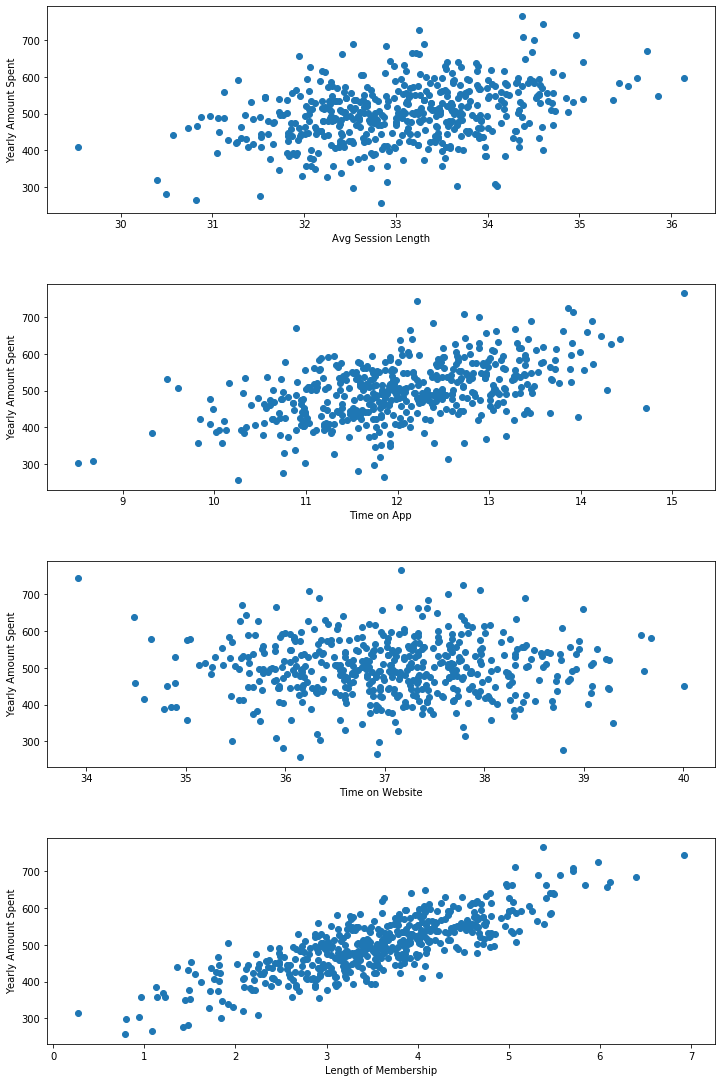

In [13]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(10)
fig.set_figheight(15)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [14]:
df=df[['Time on Website','Yearly Amount Spent']]
df

,Time on Website,Yearly Amount Spent
0,39.577668,587.951054
1,37.268959,392.204933
2,37.110597,487.547505
3,36.721283,581.852344
4,37.536653,599.406092
...,...,...
495,36.417985,573.847438
496,37.190268,529.049004
497,38.332576,551.620145
498,36.840086,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [16]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=20)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)
    
regr.coef_, regr.intercept_

(array([1.65144749]), 438.2220161891897)

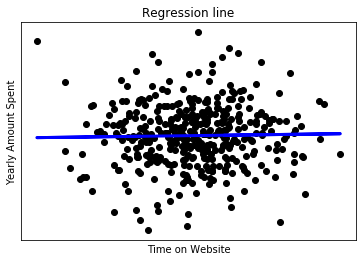

In [20]:
y_train_pred = regr.predict(xTrain)

plt.scatter(xTrain, yTrain,  color='black')
plt.plot(xTrain, y_train_pred, color='blue', linewidth=3)

plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.title('Regression line')

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTrain, y_train_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTrain, y_train_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTrain, y_train_pred)))

print('R-squared: %.2f'
      % r2_score(yTrain, y_train_pred))

Mean absolute error: 62.02
Mean squared error: 6475.87


NameError: name 'np' is not defined

In [26]:
y_pred = regr.predict(xTest)

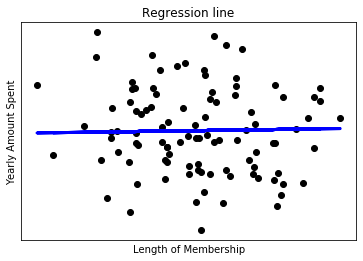

In [27]:

plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, y_pred, color='blue', linewidth=3)

plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Regression line')

plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTrain, y_train_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTrain, y_train_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTrain, y_train_pred)))

print('R-squared: %.2f'
      % r2_score(yTrain, y_train_pred))

Mean absolute error: 62.02
Mean squared error: 6475.87


NameError: name 'np' is not defined